<a href="https://colab.research.google.com/github/HPNChanel/Colab-Machine-Learning-Model/blob/main/Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sử dụng bộ dữ liệu Iris từ thư viện sklearn, tập trung vào việc phân loại 2 lớp chính là **Iris Setosa và Iris Versicolor**

1. Import và chuẩn bị các libraries cần thiết

In [ ]:
# Import các thư viện cần thiết
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Hiển thị biểu đồ trực tiếp trên colab
%matplotlib inline
sns.set_style("whitegrid")

2. Load dữ liệu Iris từ thư viện dataset

In [ ]:
# Tải bộ dữ liệu Iris
iris = load_iris()

# Lấy ra hai lớp để phân loại(Setosa và Versicolor)
X = iris.data[:100, :2]  # Chọn 2 đặc trưng đầu tiên(Sepal Length & Sepal Width)
y = iris.target[:100]  # Chọn label tương ứng(0: Setosa, 1: Versicolor)

# Chia dữ liệu thành tập huấn luyện và kiểm tra(70% huấn luyện và 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

3. Huấn luyện mô hình

In [ ]:
# Khởi tạo và huấn luyện Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán kết quả dựa trên tập kiểm tra
y_pred = model.predict(X_test)

4. Đánh giá mô hình

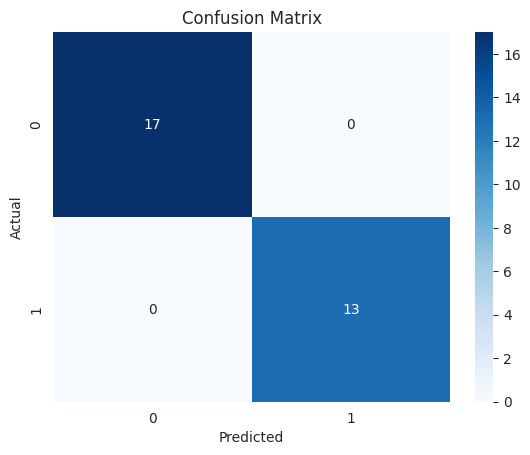

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Tạo ma trận nhầm lẫn(Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, cmap = "Blues", fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Báo cáo chi tiết hiệu suất mô hình (Model Performance)
print("Classification Report:")
print(classification_report(y_test, y_pred))

5. Trực quan hóa kết quả

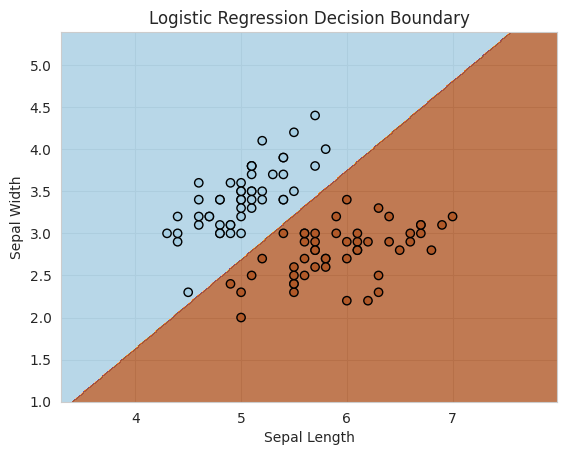

In [ ]:
# Trực quan hóa kết quả dữ liệu và ranh giới quyết định của Logistic Regression
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán cho toàn bộ không gian điểm
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.8, cmap = "Paired")
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolor = "k", cmap = "Paired")  # Vẽ biểu đô phân tán
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Logistic Regression Decision Boundary")
plt.show()